# 1.SINGLE IMAGE

In [1]:
# Imports
import numpy as np
import cv2  # Ensure OpenCV is installed, or use PIL if preferred
import matplotlib.pyplot as plt

In [2]:
# Mean-Shift Clustering Implementation
import numpy as np
from sklearn.cluster import MeanShift
def mean_shift_clustering(image_data, bandwidth):
    # Create a MeanShift object with specified bandwidth
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    # Fit the model to the data and predict the cluster assignments
    labels = mean_shift.fit_predict(image_data)
    # Extract cluster centers
    centers = mean_shift.cluster_centers_
    return labels, centers

Image loaded successfully.


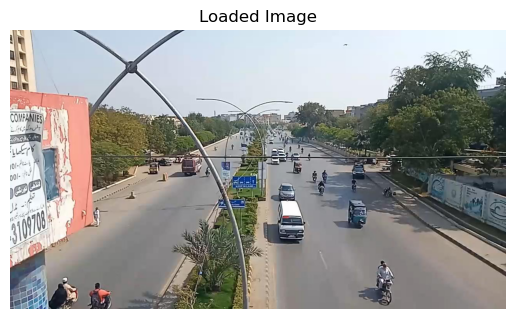

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Path to the local image
image_path = r'C:\Users\lenovo1\Downloads\frame1.jpg'

# Load the image from the local path
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is not None:
    print("Image loaded successfully.")
    # Convert image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(image_rgb)
    plt.title('Loaded Image')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
else:
    print("Failed to load image. Please check the file path.")


In [4]:
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB).reshape((-1, 3))


In [5]:
labels, centers = mean_shift_clustering(lab_image, bandwidth=30)


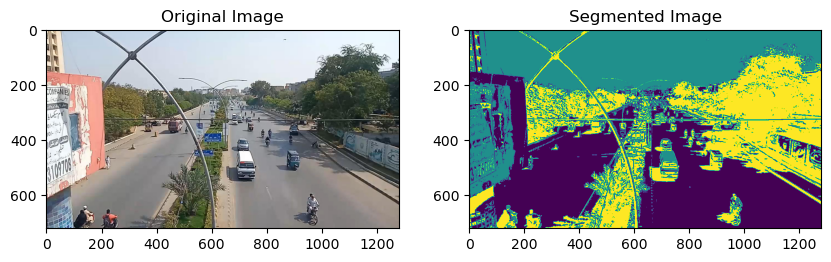

In [6]:
# Visualization
segmented_image = labels.reshape(image.shape[:2])  # Reshape labels to the image shape

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Displaying the original image
plt.title('Original Image')
plt.subplot(122)
plt.imshow(segmented_image)  # Displaying the segmented image
plt.title('Segmented Image')
plt.show()

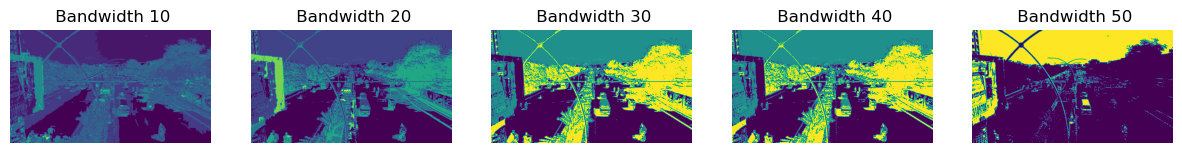

In [7]:
# Experimentation
# Try different bandwidth values to see how they affect segmentation
bandwidth_values = [10,20,30,40,50]
results = {}

for bandwidth in bandwidth_values:
    labels, centers = mean_shift_clustering(lab_image, bandwidth=bandwidth)
    segmented_image = labels.reshape(image.shape[:2])
    results[bandwidth] = segmented_image

# Plotting the results for different bandwidths
plt.figure(figsize=(15, 5))
for i, bandwidth in enumerate(bandwidth_values, 1):
    plt.subplot(1, len(bandwidth_values), i)
    plt.imshow(results[bandwidth], cmap='viridis')
    plt.title(f' Bandwidth {bandwidth}')
    plt.axis('off')
plt.show()

# EFFECT OF CHANGING BANDWITH

In the images, you can see that with smaller bandwidths (10 and 20), the clustering is more granular, with smaller regions being identified as separate clusters.

In the images, with larger bandwidths (30, 40, and 50), the clustering becomes coarser, and larger areas are grouped together.

After seeing images 30 would be choice  for clustering.

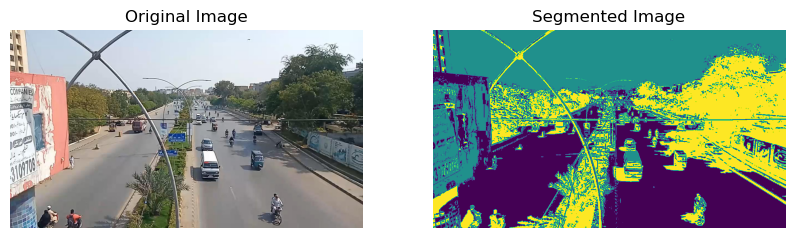

Cluster centers shape: (3, 3)
Number of clusters: 3


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth

# Custom MeanShift clustering function
def mean_shift_clustering(data, bandwidth=30):
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    centers = ms.cluster_centers_
    return labels, centers

# Load the image
image_path = r'C:\Users\lenovo1\Downloads\frame1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
original_shape = image.shape

# Convert to LAB color space and flatten
lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB).reshape((-1, 3))

# Perform clustering in LAB color space
bandwidth = 30  # Predefined bandwidth
labels, cluster_centers = mean_shift_clustering(lab_image, bandwidth)

# Reshape labels back to the image's spatial dimensions
segmented_image = labels.reshape(original_shape[:2])

# Visualization
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Segmented Image
plt.subplot(122)
plt.imshow(segmented_image, cmap='viridis')  # Apply a colormap for distinct cluster visualization
plt.title('Segmented Image')
plt.axis('off')

plt.show()

# Display the results
print(f"Cluster centers shape: {cluster_centers.shape}")
print(f"Number of clusters: {len(np.unique(labels))}")


We can see that there are three clusters is forming after applying mean shift with bandwith=30.